In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.spatial import distance
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from utils import get_full_df, create_train_negative

In [2]:
PATH_TRAIN = 'data/train.csv'
PATH_TEST = 'data/test.csv'
IS_TRAIN = 'is_train'
TARGET = 'target'
RANDOM_STATE = 42

In [3]:
df_train = pd.read_csv(PATH_TRAIN, sep=',', index_col=None)
df_test = pd.read_csv(PATH_TEST, sep=',', index_col=None)

df = get_full_df(df_train.copy(), df_test.copy(), key=IS_TRAIN)

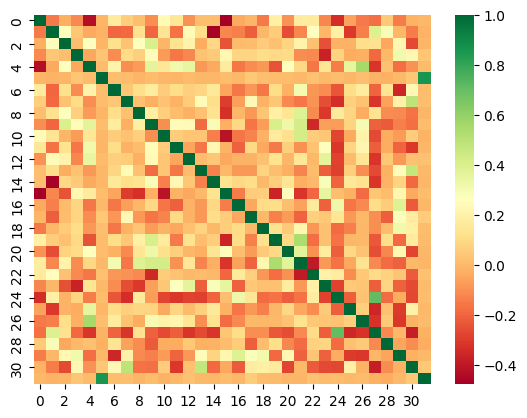

corr(5, target): 0.8588


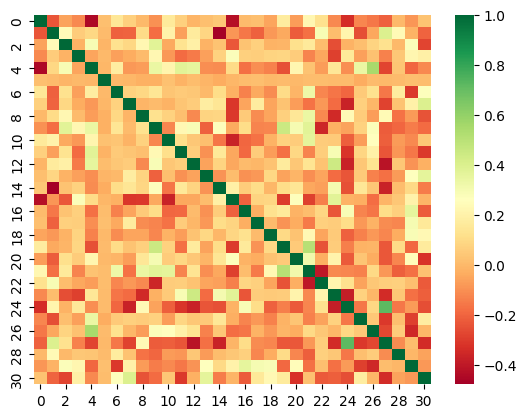

In [5]:
corr_train = df_train.corr()
sb.heatmap(corr_train, cmap="RdYlGn", annot=False)
plt.show()
print(f"corr(5, target): {round(corr_train['5'][TARGET], 4)}")

corr_test = df_test.corr()
sb.heatmap(corr_test, cmap="RdYlGn", annot=False)
plt.show()

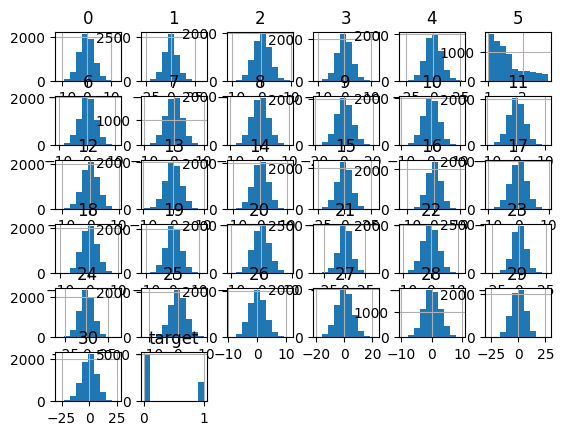

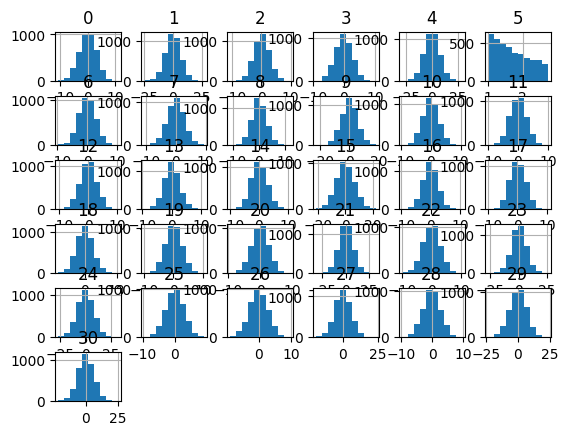

In [6]:
for dataframe in [df_train, df_test]:
    dataframe.hist()

3920 6963


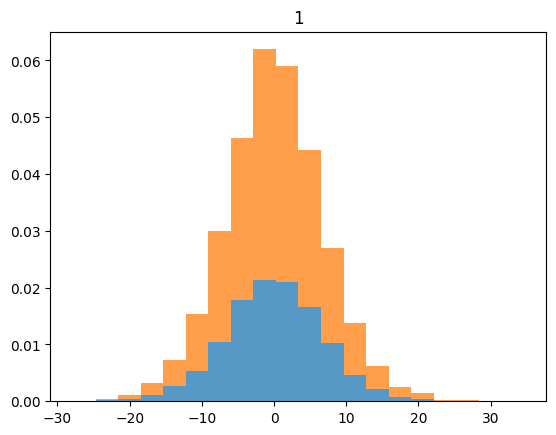

3920 6963


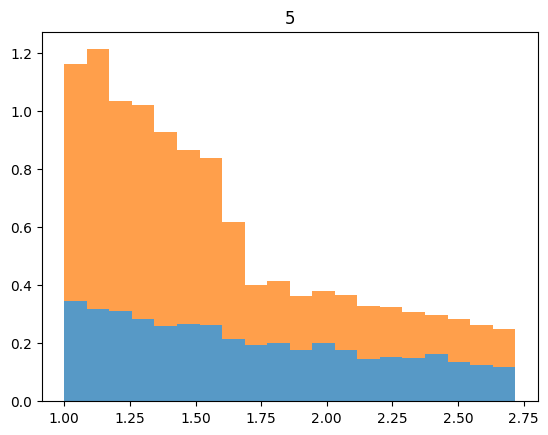

In [7]:
# for index in range(0, 31):
for index in [1, 5]:  # to compare
    index_str = str(index)
    x_multi = [df[df[IS_TRAIN] == 0][index_str], df[df[IS_TRAIN] == 1][index_str]]
    
    print(len(x_multi[0]), len(x_multi[1]))
    
    plt.hist(x_multi, 20, density=True, histtype='bar', stacked=True, alpha=0.75)
    plt.title(index_str)
    plt.show()

In [8]:
all_features = df_test.columns.tolist()

features = all_features.copy()
features.remove('5')

print(all_features)
print(features)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


In [9]:
for feats in [all_features, features]:
    x_train, x_test, y_train, y_test = train_test_split(df[feats], df[IS_TRAIN], 
                                                        test_size=0.2, stratify=df[IS_TRAIN], 
                                                        random_state=RANDOM_STATE)

    log_reg = LogisticRegression(random_state=RANDOM_STATE)
    log_reg.fit(x_train, y_train)
    
    auc_train = roc_auc_score(y_train, log_reg.predict(x_train))
    auc_test = roc_auc_score(y_test, log_reg.predict(x_test))

    print(auc_train, auc_test)

0.5367345221302166 0.5246897754076505
0.5 0.5


In [10]:
target_counts = df_train[TARGET].value_counts()

print(target_counts, end='\n' * 2)
print(target_counts[1] / target_counts[0])

0    4963
1    2000
Name: target, dtype: int64

0.40298206729800523


In [12]:
df_train_neg = create_train_negative(df_train, random_state=RANDOM_STATE)

(6963, 32)
(6963, 32) (4000, 32)
0    2000
1    2000
Name: target, dtype: int64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_train[features], df_train[TARGET], 
                                                    test_size=0.2, stratify=df_train[TARGET], 
                                                    random_state=RANDOM_STATE)

x_train_neg, x_test_neg, y_train_neg, y_test_neg = train_test_split(df_train_neg[features], df_train_neg[TARGET], 
                                                                    test_size=0.2, stratify=df_train_neg[TARGET], 
                                                                    random_state=RANDOM_STATE)

In [14]:
model = CatBoostClassifier(
    iterations=2000,
    depth=8,
    random_state=RANDOM_STATE,
    eval_metric='F1'
)

model.fit(x_train, y_train, eval_set=(x_test, y_test))

print(f1_score(y_train, model.predict(x_train)))
print(f1_score(y_test, model.predict(x_test)))

Learning rate set to 0.035825
0:	learn: 0.2508961	test: 0.2252964	best: 0.2252964 (0)	total: 73.5ms	remaining: 2m 27s
1:	learn: 0.2302313	test: 0.1936842	best: 0.2252964 (0)	total: 89.8ms	remaining: 1m 29s
2:	learn: 0.2606838	test: 0.1957447	best: 0.2252964 (0)	total: 106ms	remaining: 1m 10s
3:	learn: 0.2374179	test: 0.2013129	best: 0.2252964 (0)	total: 123ms	remaining: 1m 1s
4:	learn: 0.2272477	test: 0.1879195	best: 0.2252964 (0)	total: 138ms	remaining: 55.1s
5:	learn: 0.2001124	test: 0.1431871	best: 0.2252964 (0)	total: 154ms	remaining: 51.2s
6:	learn: 0.2271468	test: 0.1431871	best: 0.2252964 (0)	total: 169ms	remaining: 48.2s
7:	learn: 0.2878545	test: 0.1891892	best: 0.2252964 (0)	total: 185ms	remaining: 46s
8:	learn: 0.3068783	test: 0.2251656	best: 0.2252964 (0)	total: 201ms	remaining: 44.5s
9:	learn: 0.3023873	test: 0.1977528	best: 0.2252964 (0)	total: 218ms	remaining: 43.4s
10:	learn: 0.3068783	test: 0.2017937	best: 0.2252964 (0)	total: 236ms	remaining: 42.7s
11:	learn: 0.3149026

99:	learn: 0.8171091	test: 0.6306914	best: 0.6306914 (99)	total: 1.69s	remaining: 32s
100:	learn: 0.8171091	test: 0.6260575	best: 0.6306914 (99)	total: 1.7s	remaining: 32s
101:	learn: 0.8188513	test: 0.6317568	best: 0.6317568 (101)	total: 1.72s	remaining: 32s
102:	learn: 0.8205882	test: 0.6329966	best: 0.6329966 (102)	total: 1.74s	remaining: 32s
103:	learn: 0.8223201	test: 0.6317568	best: 0.6329966 (102)	total: 1.75s	remaining: 31.9s
104:	learn: 0.8256410	test: 0.6409396	best: 0.6409396 (104)	total: 1.77s	remaining: 31.9s
105:	learn: 0.8273592	test: 0.6409396	best: 0.6409396 (104)	total: 1.78s	remaining: 31.9s
106:	learn: 0.8290723	test: 0.6432161	best: 0.6432161 (106)	total: 1.8s	remaining: 31.8s
107:	learn: 0.8320583	test: 0.6454849	best: 0.6454849 (107)	total: 1.81s	remaining: 31.8s
108:	learn: 0.8354522	test: 0.6522463	best: 0.6522463 (108)	total: 1.83s	remaining: 31.8s
109:	learn: 0.8358751	test: 0.6544850	best: 0.6544850 (109)	total: 1.84s	remaining: 31.7s
110:	learn: 0.8371418	t

202:	learn: 0.9411376	test: 0.7606061	best: 0.7624811 (198)	total: 3.35s	remaining: 29.7s
203:	learn: 0.9421870	test: 0.7636364	best: 0.7636364 (203)	total: 3.37s	remaining: 29.7s
204:	learn: 0.9425363	test: 0.7624811	best: 0.7636364 (203)	total: 3.38s	remaining: 29.6s
205:	learn: 0.9428854	test: 0.7643505	best: 0.7643505 (205)	total: 3.4s	remaining: 29.6s
206:	learn: 0.9442796	test: 0.7631976	best: 0.7643505 (205)	total: 3.42s	remaining: 29.6s
207:	learn: 0.9456701	test: 0.7575758	best: 0.7643505 (205)	total: 3.43s	remaining: 29.6s
208:	learn: 0.9456701	test: 0.7594554	best: 0.7643505 (205)	total: 3.45s	remaining: 29.6s
209:	learn: 0.9460171	test: 0.7613293	best: 0.7643505 (205)	total: 3.47s	remaining: 29.5s
210:	learn: 0.9480946	test: 0.7631976	best: 0.7643505 (205)	total: 3.48s	remaining: 29.5s
211:	learn: 0.9480946	test: 0.7650602	best: 0.7650602 (211)	total: 3.5s	remaining: 29.5s
212:	learn: 0.9477489	test: 0.7631976	best: 0.7650602 (211)	total: 3.51s	remaining: 29.5s
213:	learn: 

306:	learn: 0.9795918	test: 0.7805596	best: 0.7805596 (305)	total: 5.03s	remaining: 27.8s
307:	learn: 0.9792663	test: 0.7823529	best: 0.7823529 (307)	total: 5.05s	remaining: 27.7s
308:	learn: 0.9802422	test: 0.7859238	best: 0.7859238 (308)	total: 5.07s	remaining: 27.7s
309:	learn: 0.9805671	test: 0.7823529	best: 0.7859238 (308)	total: 5.08s	remaining: 27.7s
310:	learn: 0.9808917	test: 0.7812041	best: 0.7859238 (308)	total: 5.1s	remaining: 27.7s
311:	learn: 0.9802422	test: 0.7805596	best: 0.7859238 (308)	total: 5.11s	remaining: 27.7s
312:	learn: 0.9812162	test: 0.7805596	best: 0.7859238 (308)	total: 5.13s	remaining: 27.6s
313:	learn: 0.9808917	test: 0.7799114	best: 0.7859238 (308)	total: 5.14s	remaining: 27.6s
314:	learn: 0.9812162	test: 0.7823529	best: 0.7859238 (308)	total: 5.16s	remaining: 27.6s
315:	learn: 0.9808917	test: 0.7817109	best: 0.7859238 (308)	total: 5.18s	remaining: 27.6s
316:	learn: 0.9812162	test: 0.7817109	best: 0.7859238 (308)	total: 5.19s	remaining: 27.6s
317:	learn:

410:	learn: 0.9949749	test: 0.8085714	best: 0.8102710 (406)	total: 6.72s	remaining: 26s
411:	learn: 0.9949749	test: 0.8068670	best: 0.8102710 (406)	total: 6.74s	remaining: 26s
412:	learn: 0.9952904	test: 0.8068670	best: 0.8102710 (406)	total: 6.75s	remaining: 26s
413:	learn: 0.9952904	test: 0.8097282	best: 0.8102710 (406)	total: 6.77s	remaining: 25.9s
414:	learn: 0.9952904	test: 0.8068670	best: 0.8102710 (406)	total: 6.79s	remaining: 25.9s
415:	learn: 0.9952904	test: 0.8102710	best: 0.8102710 (406)	total: 6.8s	remaining: 25.9s
416:	learn: 0.9952904	test: 0.8114286	best: 0.8114286 (416)	total: 6.82s	remaining: 25.9s
417:	learn: 0.9952904	test: 0.8102710	best: 0.8114286 (416)	total: 6.83s	remaining: 25.9s
418:	learn: 0.9952904	test: 0.8085714	best: 0.8114286 (416)	total: 6.85s	remaining: 25.9s
419:	learn: 0.9952904	test: 0.8051576	best: 0.8114286 (416)	total: 6.87s	remaining: 25.8s
420:	learn: 0.9952904	test: 0.8085714	best: 0.8114286 (416)	total: 6.88s	remaining: 25.8s
421:	learn: 0.995

514:	learn: 0.9993746	test: 0.8193457	best: 0.8215297 (495)	total: 8.39s	remaining: 24.2s
515:	learn: 0.9993746	test: 0.8193457	best: 0.8215297 (495)	total: 8.41s	remaining: 24.2s
516:	learn: 0.9993746	test: 0.8193457	best: 0.8215297 (495)	total: 8.42s	remaining: 24.2s
517:	learn: 0.9993746	test: 0.8181818	best: 0.8215297 (495)	total: 8.44s	remaining: 24.1s
518:	learn: 0.9993746	test: 0.8193457	best: 0.8215297 (495)	total: 8.46s	remaining: 24.1s
519:	learn: 0.9993746	test: 0.8165007	best: 0.8215297 (495)	total: 8.47s	remaining: 24.1s
520:	learn: 0.9993746	test: 0.8170213	best: 0.8215297 (495)	total: 8.49s	remaining: 24.1s
521:	learn: 0.9993746	test: 0.8153409	best: 0.8215297 (495)	total: 8.5s	remaining: 24.1s
522:	learn: 0.9993746	test: 0.8153409	best: 0.8215297 (495)	total: 8.52s	remaining: 24.1s
523:	learn: 0.9993746	test: 0.8153409	best: 0.8215297 (495)	total: 8.53s	remaining: 24s
524:	learn: 0.9996874	test: 0.8153409	best: 0.8215297 (495)	total: 8.55s	remaining: 24s
525:	learn: 0.9

618:	learn: 1.0000000	test: 0.8246844	best: 0.8260255 (553)	total: 10.1s	remaining: 22.4s
619:	learn: 1.0000000	test: 0.8235294	best: 0.8260255 (553)	total: 10.1s	remaining: 22.4s
620:	learn: 1.0000000	test: 0.8218794	best: 0.8260255 (553)	total: 10.1s	remaining: 22.4s
621:	learn: 1.0000000	test: 0.8218794	best: 0.8260255 (553)	total: 10.1s	remaining: 22.4s
622:	learn: 1.0000000	test: 0.8218794	best: 0.8260255 (553)	total: 10.1s	remaining: 22.4s
623:	learn: 1.0000000	test: 0.8202247	best: 0.8260255 (553)	total: 10.1s	remaining: 22.4s
624:	learn: 1.0000000	test: 0.8218794	best: 0.8260255 (553)	total: 10.2s	remaining: 22.3s
625:	learn: 1.0000000	test: 0.8202247	best: 0.8260255 (553)	total: 10.2s	remaining: 22.3s
626:	learn: 1.0000000	test: 0.8218794	best: 0.8260255 (553)	total: 10.2s	remaining: 22.3s
627:	learn: 1.0000000	test: 0.8235294	best: 0.8260255 (553)	total: 10.2s	remaining: 22.3s
628:	learn: 1.0000000	test: 0.8213783	best: 0.8260255 (553)	total: 10.2s	remaining: 22.3s
629:	learn

722:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.7s	remaining: 20.7s
723:	learn: 1.0000000	test: 0.8268156	best: 0.8296089 (701)	total: 11.7s	remaining: 20.7s
724:	learn: 1.0000000	test: 0.8284519	best: 0.8296089 (701)	total: 11.7s	remaining: 20.6s
725:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.8s	remaining: 20.6s
726:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.8s	remaining: 20.6s
727:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.8s	remaining: 20.6s
728:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.8s	remaining: 20.6s
729:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.8s	remaining: 20.6s
730:	learn: 1.0000000	test: 0.8268156	best: 0.8296089 (701)	total: 11.8s	remaining: 20.5s
731:	learn: 1.0000000	test: 0.8268156	best: 0.8296089 (701)	total: 11.9s	remaining: 20.5s
732:	learn: 1.0000000	test: 0.8251748	best: 0.8296089 (701)	total: 11.9s	remaining: 20.5s
733:	learn

823:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.4s	remaining: 19.1s
824:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.4s	remaining: 19.1s
825:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.4s	remaining: 19.1s
826:	learn: 1.0000000	test: 0.8319328	best: 0.8335664 (814)	total: 13.4s	remaining: 19s
827:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.4s	remaining: 19s
828:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.5s	remaining: 19s
829:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.5s	remaining: 19s
830:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.5s	remaining: 19s
831:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.5s	remaining: 19s
832:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.5s	remaining: 18.9s
833:	learn: 1.0000000	test: 0.8335664	best: 0.8335664 (814)	total: 13.5s	remaining: 18.9s
834:	learn: 1.0000000	

927:	learn: 1.0000000	test: 0.8347339	best: 0.8347339 (919)	total: 15s	remaining: 17.4s
928:	learn: 1.0000000	test: 0.8347339	best: 0.8347339 (919)	total: 15s	remaining: 17.3s
929:	learn: 1.0000000	test: 0.8342697	best: 0.8347339 (919)	total: 15.1s	remaining: 17.3s
930:	learn: 1.0000000	test: 0.8342697	best: 0.8347339 (919)	total: 15.1s	remaining: 17.3s
931:	learn: 1.0000000	test: 0.8330996	best: 0.8347339 (919)	total: 15.1s	remaining: 17.3s
932:	learn: 1.0000000	test: 0.8330996	best: 0.8347339 (919)	total: 15.1s	remaining: 17.3s
933:	learn: 1.0000000	test: 0.8330996	best: 0.8347339 (919)	total: 15.1s	remaining: 17.3s
934:	learn: 1.0000000	test: 0.8342697	best: 0.8347339 (919)	total: 15.1s	remaining: 17.2s
935:	learn: 1.0000000	test: 0.8342697	best: 0.8347339 (919)	total: 15.2s	remaining: 17.2s
936:	learn: 1.0000000	test: 0.8330996	best: 0.8347339 (919)	total: 15.2s	remaining: 17.2s
937:	learn: 1.0000000	test: 0.8330996	best: 0.8347339 (919)	total: 15.2s	remaining: 17.2s
938:	learn: 1.

1031:	learn: 1.0000000	test: 0.8319328	best: 0.8375350 (1008)	total: 16.7s	remaining: 15.7s
1032:	learn: 1.0000000	test: 0.8330996	best: 0.8375350 (1008)	total: 16.7s	remaining: 15.7s
1033:	learn: 1.0000000	test: 0.8330996	best: 0.8375350 (1008)	total: 16.7s	remaining: 15.6s
1034:	learn: 1.0000000	test: 0.8347339	best: 0.8375350 (1008)	total: 16.8s	remaining: 15.6s
1035:	learn: 1.0000000	test: 0.8330996	best: 0.8375350 (1008)	total: 16.8s	remaining: 15.6s
1036:	learn: 1.0000000	test: 0.8330996	best: 0.8375350 (1008)	total: 16.8s	remaining: 15.6s
1037:	learn: 1.0000000	test: 0.8314607	best: 0.8375350 (1008)	total: 16.8s	remaining: 15.6s
1038:	learn: 1.0000000	test: 0.8314607	best: 0.8375350 (1008)	total: 16.8s	remaining: 15.6s
1039:	learn: 1.0000000	test: 0.8302945	best: 0.8375350 (1008)	total: 16.8s	remaining: 15.5s
1040:	learn: 1.0000000	test: 0.8302945	best: 0.8375350 (1008)	total: 16.9s	remaining: 15.5s
1041:	learn: 1.0000000	test: 0.8302945	best: 0.8375350 (1008)	total: 16.9s	remai

1121:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.2s	remaining: 14.2s
1122:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.2s	remaining: 14.2s
1123:	learn: 1.0000000	test: 0.8338028	best: 0.8375350 (1008)	total: 18.2s	remaining: 14.2s
1124:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.2s	remaining: 14.2s
1125:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.2s	remaining: 14.1s
1126:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.2s	remaining: 14.1s
1127:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.3s	remaining: 14.1s
1128:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.3s	remaining: 14.1s
1129:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.3s	remaining: 14.1s
1130:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.3s	remaining: 14.1s
1131:	learn: 1.0000000	test: 0.8349788	best: 0.8375350 (1008)	total: 18.3s	remai

1223:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.8s	remaining: 12.6s
1224:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.8s	remaining: 12.6s
1225:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.5s
1226:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.5s
1227:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.5s
1228:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.5s
1229:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.5s
1230:	learn: 1.0000000	test: 0.8366197	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.4s
1231:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 19.9s	remaining: 12.4s
1232:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 20s	remaining: 12.4s
1233:	learn: 1.0000000	test: 0.8382560	best: 0.8387097 (1172)	total: 20s	remaining

1313:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.3s	remaining: 11.1s
1314:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.3s	remaining: 11.1s
1315:	learn: 1.0000000	test: 0.8370787	best: 0.8403361 (1296)	total: 21.3s	remaining: 11.1s
1316:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.3s	remaining: 11.1s
1317:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.3s	remaining: 11s
1318:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.4s	remaining: 11s
1319:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.4s	remaining: 11s
1320:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.4s	remaining: 11s
1321:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.4s	remaining: 11s
1322:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 21.4s	remaining: 11s
1323:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 21.4s	remaining: 10.9s


1415:	learn: 1.0000000	test: 0.8359046	best: 0.8403361 (1296)	total: 22.9s	remaining: 9.46s
1416:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 22.9s	remaining: 9.44s
1417:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 23s	remaining: 9.43s
1418:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 23s	remaining: 9.41s
1419:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 23s	remaining: 9.39s
1420:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 23s	remaining: 9.38s
1421:	learn: 1.0000000	test: 0.8375350	best: 0.8403361 (1296)	total: 23s	remaining: 9.36s
1422:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 23.1s	remaining: 9.35s
1423:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 23.1s	remaining: 9.34s
1424:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 23.1s	remaining: 9.32s
1425:	learn: 1.0000000	test: 0.8387097	best: 0.8403361 (1296)	total: 23.1s	remaining: 9.31

1514:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 24.6s	remaining: 7.88s
1515:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 24.6s	remaining: 7.86s
1516:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 24.6s	remaining: 7.85s
1517:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 24.7s	remaining: 7.83s
1518:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 24.7s	remaining: 7.82s
1519:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 24.7s	remaining: 7.8s
1520:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 24.7s	remaining: 7.78s
1521:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 24.7s	remaining: 7.77s
1522:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 24.7s	remaining: 7.75s
1523:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 24.8s	remaining: 7.74s
1524:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 24.8s	remain

1604:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.1s	remaining: 6.42s
1605:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.1s	remaining: 6.4s
1606:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.1s	remaining: 6.39s
1607:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.1s	remaining: 6.37s
1608:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.1s	remaining: 6.35s
1609:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.2s	remaining: 6.34s
1610:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.2s	remaining: 6.32s
1611:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.2s	remaining: 6.3s
1612:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.2s	remaining: 6.29s
1613:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.2s	remaining: 6.27s
1614:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 26.2s	remaini

1694:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.5s	remaining: 4.95s
1695:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.5s	remaining: 4.94s
1696:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.6s	remaining: 4.92s
1697:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.6s	remaining: 4.91s
1698:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.6s	remaining: 4.89s
1699:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.6s	remaining: 4.87s
1700:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 27.6s	remaining: 4.86s
1701:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 27.7s	remaining: 4.84s
1702:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 27.7s	remaining: 4.83s
1703:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 27.7s	remaining: 4.81s
1704:	learn: 1.0000000	test: 0.8363636	best: 0.8407821 (1460)	total: 27.7s	remai

1784:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 29s	remaining: 3.49s
1785:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 29s	remaining: 3.48s
1786:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 29s	remaining: 3.46s
1787:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 29s	remaining: 3.44s
1788:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 29.1s	remaining: 3.43s
1789:	learn: 1.0000000	test: 0.8379888	best: 0.8407821 (1460)	total: 29.1s	remaining: 3.41s
1790:	learn: 1.0000000	test: 0.8396095	best: 0.8407821 (1460)	total: 29.1s	remaining: 3.39s
1791:	learn: 1.0000000	test: 0.8396095	best: 0.8407821 (1460)	total: 29.1s	remaining: 3.38s
1792:	learn: 1.0000000	test: 0.8396095	best: 0.8407821 (1460)	total: 29.1s	remaining: 3.36s
1793:	learn: 1.0000000	test: 0.8396095	best: 0.8407821 (1460)	total: 29.1s	remaining: 3.35s
1794:	learn: 1.0000000	test: 0.8396095	best: 0.8407821 (1460)	total: 29.2s	remaining: 3.

1875:	learn: 1.0000000	test: 0.8396095	best: 0.8407821 (1460)	total: 30.5s	remaining: 2.01s
1876:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.5s	remaining: 2s
1877:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.5s	remaining: 1.98s
1878:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.5s	remaining: 1.96s
1879:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.5s	remaining: 1.95s
1880:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.5s	remaining: 1.93s
1881:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.6s	remaining: 1.92s
1882:	learn: 1.0000000	test: 0.8368201	best: 0.8407821 (1460)	total: 30.6s	remaining: 1.9s
1883:	learn: 1.0000000	test: 0.8368201	best: 0.8407821 (1460)	total: 30.6s	remaining: 1.88s
1884:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.6s	remaining: 1.87s
1885:	learn: 1.0000000	test: 0.8384401	best: 0.8407821 (1460)	total: 30.6s	remaining

1973:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.1s	remaining: 423ms
1974:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.1s	remaining: 407ms
1975:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.2s	remaining: 391ms
1976:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.2s	remaining: 374ms
1977:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.2s	remaining: 358ms
1978:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.2s	remaining: 342ms
1979:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.2s	remaining: 326ms
1980:	learn: 1.0000000	test: 0.8428373	best: 0.8440111 (1967)	total: 32.3s	remaining: 309ms
1981:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.3s	remaining: 293ms
1982:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.3s	remaining: 277ms
1983:	learn: 1.0000000	test: 0.8440111	best: 0.8440111 (1967)	total: 32.3s	remai

In [15]:
model_neg = CatBoostClassifier(
    iterations=2000,
    depth=8,
    random_state=RANDOM_STATE,
    eval_metric='F1'
)

model.fit(x_train_neg, y_train_neg, eval_set=(x_test_neg, y_test_neg))

print(f1_score(y_train_neg, model.predict(x_train_neg)))
print(f1_score(y_test_neg, model.predict(x_test_neg)))

Learning rate set to 0.031242
0:	learn: 0.6448659	test: 0.6214099	best: 0.6214099 (0)	total: 22ms	remaining: 43.9s
1:	learn: 0.7154315	test: 0.6880616	best: 0.6880616 (1)	total: 37.2ms	remaining: 37.2s
2:	learn: 0.7672194	test: 0.7039801	best: 0.7039801 (2)	total: 52.3ms	remaining: 34.8s
3:	learn: 0.7885533	test: 0.7430730	best: 0.7430730 (3)	total: 67.2ms	remaining: 33.5s
4:	learn: 0.8068834	test: 0.7602484	best: 0.7602484 (4)	total: 82.2ms	remaining: 32.8s
5:	learn: 0.8349146	test: 0.7743527	best: 0.7743527 (5)	total: 97ms	remaining: 32.2s
6:	learn: 0.8496193	test: 0.7955112	best: 0.7955112 (6)	total: 112ms	remaining: 31.9s
7:	learn: 0.8453739	test: 0.7855362	best: 0.7955112 (6)	total: 127ms	remaining: 31.7s
8:	learn: 0.8656339	test: 0.7960688	best: 0.7960688 (8)	total: 142ms	remaining: 31.5s
9:	learn: 0.8786453	test: 0.7975309	best: 0.7975309 (9)	total: 158ms	remaining: 31.4s
10:	learn: 0.8777251	test: 0.8128079	best: 0.8128079 (10)	total: 172ms	remaining: 31.2s
11:	learn: 0.8864353

103:	learn: 0.9675999	test: 0.8764045	best: 0.8858561 (79)	total: 1.63s	remaining: 29.7s
104:	learn: 0.9672956	test: 0.8800000	best: 0.8858561 (79)	total: 1.65s	remaining: 29.8s
105:	learn: 0.9682490	test: 0.8775000	best: 0.8858561 (79)	total: 1.67s	remaining: 29.8s
106:	learn: 0.9688777	test: 0.8775000	best: 0.8858561 (79)	total: 1.68s	remaining: 29.7s
107:	learn: 0.9692018	test: 0.8785982	best: 0.8858561 (79)	total: 1.7s	remaining: 29.7s
108:	learn: 0.9691824	test: 0.8796992	best: 0.8858561 (79)	total: 1.71s	remaining: 29.7s
109:	learn: 0.9694873	test: 0.8800000	best: 0.8858561 (79)	total: 1.72s	remaining: 29.6s
110:	learn: 0.9707639	test: 0.8789014	best: 0.8858561 (79)	total: 1.74s	remaining: 29.6s
111:	learn: 0.9720214	test: 0.8836045	best: 0.8858561 (79)	total: 1.75s	remaining: 29.6s
112:	learn: 0.9726501	test: 0.8863920	best: 0.8863920 (112)	total: 1.77s	remaining: 29.5s
113:	learn: 0.9729560	test: 0.8866750	best: 0.8866750 (113)	total: 1.78s	remaining: 29.5s
114:	learn: 0.972327

207:	learn: 0.9881027	test: 0.8993789	best: 0.9004975 (193)	total: 3.25s	remaining: 28s
208:	learn: 0.9881027	test: 0.8993789	best: 0.9004975 (193)	total: 3.26s	remaining: 28s
209:	learn: 0.9877858	test: 0.8993789	best: 0.9004975 (193)	total: 3.28s	remaining: 28s
210:	learn: 0.9877858	test: 0.9007444	best: 0.9007444 (210)	total: 3.29s	remaining: 27.9s
211:	learn: 0.9880952	test: 0.9007444	best: 0.9007444 (210)	total: 3.31s	remaining: 27.9s
212:	learn: 0.9880952	test: 0.9018634	best: 0.9018634 (212)	total: 3.33s	remaining: 27.9s
213:	learn: 0.9887289	test: 0.9002494	best: 0.9018634 (212)	total: 3.34s	remaining: 27.9s
214:	learn: 0.9887289	test: 0.9004975	best: 0.9018634 (212)	total: 3.35s	remaining: 27.9s
215:	learn: 0.9887289	test: 0.8980100	best: 0.9018634 (212)	total: 3.37s	remaining: 27.8s
216:	learn: 0.9887289	test: 0.8991283	best: 0.9018634 (212)	total: 3.39s	remaining: 27.8s
217:	learn: 0.9893484	test: 0.8991283	best: 0.9018634 (212)	total: 3.4s	remaining: 27.8s
218:	learn: 0.989

303:	learn: 0.9981238	test: 0.8997494	best: 0.9036295 (295)	total: 4.72s	remaining: 26.4s
304:	learn: 0.9978104	test: 0.9008783	best: 0.9036295 (295)	total: 4.74s	remaining: 26.3s
305:	learn: 0.9978104	test: 0.8997494	best: 0.9036295 (295)	total: 4.75s	remaining: 26.3s
306:	learn: 0.9974969	test: 0.9022556	best: 0.9036295 (295)	total: 4.77s	remaining: 26.3s
307:	learn: 0.9981238	test: 0.9022556	best: 0.9036295 (295)	total: 4.79s	remaining: 26.3s
308:	learn: 0.9981238	test: 0.9022556	best: 0.9036295 (295)	total: 4.8s	remaining: 26.3s
309:	learn: 0.9981238	test: 0.9022556	best: 0.9036295 (295)	total: 4.82s	remaining: 26.3s
310:	learn: 0.9984370	test: 0.9036295	best: 0.9036295 (295)	total: 4.83s	remaining: 26.2s
311:	learn: 0.9981238	test: 0.9025000	best: 0.9036295 (295)	total: 4.85s	remaining: 26.2s
312:	learn: 0.9981238	test: 0.9025000	best: 0.9036295 (295)	total: 4.86s	remaining: 26.2s
313:	learn: 0.9981238	test: 0.9011264	best: 0.9036295 (295)	total: 4.88s	remaining: 26.2s
314:	learn:

398:	learn: 1.0000000	test: 0.9022556	best: 0.9050000 (364)	total: 6.19s	remaining: 24.8s
399:	learn: 1.0000000	test: 0.9025000	best: 0.9050000 (364)	total: 6.23s	remaining: 24.9s
400:	learn: 1.0000000	test: 0.9036295	best: 0.9050000 (364)	total: 6.27s	remaining: 25s
401:	learn: 1.0000000	test: 0.9036295	best: 0.9050000 (364)	total: 6.29s	remaining: 25s
402:	learn: 1.0000000	test: 0.9020101	best: 0.9050000 (364)	total: 6.3s	remaining: 25s
403:	learn: 1.0000000	test: 0.9022556	best: 0.9050000 (364)	total: 6.32s	remaining: 25s
404:	learn: 1.0000000	test: 0.9022556	best: 0.9050000 (364)	total: 6.33s	remaining: 24.9s
405:	learn: 1.0000000	test: 0.8997494	best: 0.9050000 (364)	total: 6.35s	remaining: 24.9s
406:	learn: 1.0000000	test: 0.8997494	best: 0.9050000 (364)	total: 6.36s	remaining: 24.9s
407:	learn: 1.0000000	test: 0.9008783	best: 0.9050000 (364)	total: 6.38s	remaining: 24.9s
408:	learn: 1.0000000	test: 0.8997494	best: 0.9050000 (364)	total: 6.4s	remaining: 24.9s
409:	learn: 1.000000

501:	learn: 1.0000000	test: 0.9129353	best: 0.9138577 (475)	total: 7.83s	remaining: 23.4s
502:	learn: 1.0000000	test: 0.9138577	best: 0.9138577 (475)	total: 7.85s	remaining: 23.4s
503:	learn: 1.0000000	test: 0.9138577	best: 0.9138577 (475)	total: 7.87s	remaining: 23.4s
504:	learn: 1.0000000	test: 0.9127182	best: 0.9138577 (475)	total: 7.88s	remaining: 23.3s
505:	learn: 1.0000000	test: 0.9127182	best: 0.9138577 (475)	total: 7.9s	remaining: 23.3s
506:	learn: 1.0000000	test: 0.9127182	best: 0.9138577 (475)	total: 7.91s	remaining: 23.3s
507:	learn: 1.0000000	test: 0.9113608	best: 0.9138577 (475)	total: 7.93s	remaining: 23.3s
508:	learn: 1.0000000	test: 0.9113608	best: 0.9138577 (475)	total: 7.94s	remaining: 23.3s
509:	learn: 1.0000000	test: 0.9102244	best: 0.9138577 (475)	total: 7.96s	remaining: 23.2s
510:	learn: 1.0000000	test: 0.9102244	best: 0.9138577 (475)	total: 7.97s	remaining: 23.2s
511:	learn: 1.0000000	test: 0.9115816	best: 0.9138577 (475)	total: 7.99s	remaining: 23.2s
512:	learn:

594:	learn: 1.0000000	test: 0.9142857	best: 0.9142857 (585)	total: 9.26s	remaining: 21.9s
595:	learn: 1.0000000	test: 0.9129353	best: 0.9142857 (585)	total: 9.28s	remaining: 21.9s
596:	learn: 1.0000000	test: 0.9142857	best: 0.9142857 (585)	total: 9.3s	remaining: 21.8s
597:	learn: 1.0000000	test: 0.9131514	best: 0.9142857 (585)	total: 9.31s	remaining: 21.8s
598:	learn: 1.0000000	test: 0.9118012	best: 0.9142857 (585)	total: 9.33s	remaining: 21.8s
599:	learn: 1.0000000	test: 0.9118012	best: 0.9142857 (585)	total: 9.34s	remaining: 21.8s
600:	learn: 1.0000000	test: 0.9118012	best: 0.9142857 (585)	total: 9.36s	remaining: 21.8s
601:	learn: 1.0000000	test: 0.9131514	best: 0.9142857 (585)	total: 9.37s	remaining: 21.8s
602:	learn: 1.0000000	test: 0.9131514	best: 0.9142857 (585)	total: 9.38s	remaining: 21.7s
603:	learn: 1.0000000	test: 0.9131514	best: 0.9142857 (585)	total: 9.4s	remaining: 21.7s
604:	learn: 1.0000000	test: 0.9131514	best: 0.9142857 (585)	total: 9.41s	remaining: 21.7s
605:	learn: 

691:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.7s	remaining: 20.3s
692:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.8s	remaining: 20.3s
693:	learn: 1.0000000	test: 0.9131514	best: 0.9154229 (672)	total: 10.8s	remaining: 20.3s
694:	learn: 1.0000000	test: 0.9131514	best: 0.9154229 (672)	total: 10.8s	remaining: 20.3s
695:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.8s	remaining: 20.2s
696:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.8s	remaining: 20.2s
697:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.8s	remaining: 20.2s
698:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.9s	remaining: 20.2s
699:	learn: 1.0000000	test: 0.9142857	best: 0.9154229 (672)	total: 10.9s	remaining: 20.2s
700:	learn: 1.0000000	test: 0.9131514	best: 0.9154229 (672)	total: 10.9s	remaining: 20.2s
701:	learn: 1.0000000	test: 0.9131514	best: 0.9154229 (672)	total: 10.9s	remaining: 20.1s
702:	learn

788:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 12.2s	remaining: 18.8s
789:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 12.2s	remaining: 18.8s
790:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 12.3s	remaining: 18.7s
791:	learn: 1.0000000	test: 0.9163546	best: 0.9177057 (785)	total: 12.3s	remaining: 18.7s
792:	learn: 1.0000000	test: 0.9163546	best: 0.9177057 (785)	total: 12.3s	remaining: 18.7s
793:	learn: 1.0000000	test: 0.9163546	best: 0.9177057 (785)	total: 12.3s	remaining: 18.7s
794:	learn: 1.0000000	test: 0.9163546	best: 0.9177057 (785)	total: 12.3s	remaining: 18.7s
795:	learn: 1.0000000	test: 0.9163546	best: 0.9177057 (785)	total: 12.3s	remaining: 18.7s
796:	learn: 1.0000000	test: 0.9152120	best: 0.9177057 (785)	total: 12.3s	remaining: 18.6s
797:	learn: 1.0000000	test: 0.9152120	best: 0.9177057 (785)	total: 12.4s	remaining: 18.6s
798:	learn: 1.0000000	test: 0.9152120	best: 0.9177057 (785)	total: 12.4s	remaining: 18.6s
799:	learn

885:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.7s	remaining: 17.3s
886:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.7s	remaining: 17.2s
887:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.2s
888:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.2s
889:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.2s
890:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.2s
891:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.2s
892:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.1s
893:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.8s	remaining: 17.1s
894:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.9s	remaining: 17.1s
895:	learn: 1.0000000	test: 0.9177057	best: 0.9177057 (785)	total: 13.9s	remaining: 17.1s
896:	learn

979:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.2s	remaining: 15.8s
980:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.2s	remaining: 15.8s
981:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.2s	remaining: 15.8s
982:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.2s	remaining: 15.8s
983:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.3s	remaining: 15.7s
984:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.3s	remaining: 15.7s
985:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.3s	remaining: 15.7s
986:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.3s	remaining: 15.7s
987:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.3s	remaining: 15.7s
988:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.3s	remaining: 15.7s
989:	learn: 1.0000000	test: 0.9175000	best: 0.9188514 (942)	total: 15.4s	remaining: 15.7s
990:	learn

1081:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.8s	remaining: 14.3s
1082:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.8s	remaining: 14.3s
1083:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.2s
1084:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.2s
1085:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.2s
1086:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.2s
1087:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.2s
1088:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.2s
1089:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 16.9s	remaining: 14.1s
1090:	learn: 1.0000000	test: 0.9138577	best: 0.9188514 (942)	total: 17s	remaining: 14.1s
1091:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 17s	remaining: 14.1s
109

1176:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.3s	remaining: 12.8s
1177:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.3s	remaining: 12.8s
1178:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.3s	remaining: 12.8s
1179:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.3s	remaining: 12.7s
1180:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.4s	remaining: 12.7s
1181:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.4s	remaining: 12.7s
1182:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.4s	remaining: 12.7s
1183:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.4s	remaining: 12.7s
1184:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.4s	remaining: 12.7s
1185:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.4s	remaining: 12.7s
1186:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 18.5s	remaining: 12.6s

1267:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.7s	remaining: 11.4s
1268:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.7s	remaining: 11.4s
1269:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.8s	remaining: 11.4s
1270:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.8s	remaining: 11.3s
1271:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.8s	remaining: 11.3s
1272:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.8s	remaining: 11.3s
1273:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.8s	remaining: 11.3s
1274:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.8s	remaining: 11.3s
1275:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.9s	remaining: 11.3s
1276:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.9s	remaining: 11.2s
1277:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 19.9s	remaining: 11.2s

1363:	learn: 1.0000000	test: 0.9163546	best: 0.9188514 (942)	total: 21.2s	remaining: 9.89s
1364:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.2s	remaining: 9.88s
1365:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.2s	remaining: 9.86s
1366:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.3s	remaining: 9.85s
1367:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.3s	remaining: 9.83s
1368:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.3s	remaining: 9.81s
1369:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.3s	remaining: 9.8s
1370:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.3s	remaining: 9.78s
1371:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.3s	remaining: 9.77s
1372:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.4s	remaining: 9.75s
1373:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 21.4s	remaining: 9.74s


1455:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.6s	remaining: 8.46s
1456:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.7s	remaining: 8.45s
1457:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.7s	remaining: 8.43s
1458:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.7s	remaining: 8.41s
1459:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.7s	remaining: 8.4s
1460:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.7s	remaining: 8.38s
1461:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.7s	remaining: 8.37s
1462:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.8s	remaining: 8.35s
1463:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.8s	remaining: 8.34s
1464:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 22.8s	remaining: 8.32s
1465:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 22.8s	remaining: 8.31s


1551:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 24.1s	remaining: 6.96s
1552:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 24.1s	remaining: 6.95s
1553:	learn: 1.0000000	test: 0.9129353	best: 0.9188514 (942)	total: 24.2s	remaining: 6.93s
1554:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 24.2s	remaining: 6.92s
1555:	learn: 1.0000000	test: 0.9163546	best: 0.9188514 (942)	total: 24.2s	remaining: 6.9s
1556:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 24.2s	remaining: 6.88s
1557:	learn: 1.0000000	test: 0.9163546	best: 0.9188514 (942)	total: 24.2s	remaining: 6.87s
1558:	learn: 1.0000000	test: 0.9163546	best: 0.9188514 (942)	total: 24.2s	remaining: 6.85s
1559:	learn: 1.0000000	test: 0.9163546	best: 0.9188514 (942)	total: 24.2s	remaining: 6.84s
1560:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 24.3s	remaining: 6.82s
1561:	learn: 1.0000000	test: 0.9163546	best: 0.9188514 (942)	total: 24.3s	remaining: 6.81s


1643:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.6s	remaining: 5.54s
1644:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.6s	remaining: 5.53s
1645:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.6s	remaining: 5.51s
1646:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.6s	remaining: 5.49s
1647:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.6s	remaining: 5.48s
1648:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.7s	remaining: 5.46s
1649:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.7s	remaining: 5.45s
1650:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.7s	remaining: 5.43s
1651:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.7s	remaining: 5.42s
1652:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.7s	remaining: 5.4s
1653:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 25.7s	remaining: 5.38s


1736:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.1s	remaining: 4.1s
1737:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.1s	remaining: 4.08s
1738:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.1s	remaining: 4.07s
1739:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.1s	remaining: 4.05s
1740:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.1s	remaining: 4.04s
1741:	learn: 1.0000000	test: 0.9154229	best: 0.9188514 (942)	total: 27.2s	remaining: 4.02s
1742:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.2s	remaining: 4.01s
1743:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.2s	remaining: 3.99s
1744:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.2s	remaining: 3.97s
1745:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.2s	remaining: 3.96s
1746:	learn: 1.0000000	test: 0.9165629	best: 0.9188514 (942)	total: 27.2s	remaining: 3.94s


1827:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.5s	remaining: 2.68s
1828:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 28.5s	remaining: 2.67s
1829:	learn: 1.0000000	test: 0.9140722	best: 0.9188514 (942)	total: 28.5s	remaining: 2.65s
1830:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.5s	remaining: 2.63s
1831:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.6s	remaining: 2.62s
1832:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.6s	remaining: 2.6s
1833:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.6s	remaining: 2.59s
1834:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.6s	remaining: 2.57s
1835:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.6s	remaining: 2.56s
1836:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.6s	remaining: 2.54s
1837:	learn: 1.0000000	test: 0.9152120	best: 0.9188514 (942)	total: 28.7s	remaining: 2.52s


1919:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 29.9s	remaining: 1.25s
1920:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 29.9s	remaining: 1.23s
1921:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 29.9s	remaining: 1.22s
1922:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30s	remaining: 1.2s
1923:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30s	remaining: 1.18s
1924:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30s	remaining: 1.17s
1925:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30s	remaining: 1.15s
1926:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30s	remaining: 1.14s
1927:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30s	remaining: 1.12s
1928:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30.1s	remaining: 1.11s
1929:	learn: 1.0000000	test: 0.9177057	best: 0.9188514 (942)	total: 30.1s	remaining: 1.09s
1930:	learn:

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

model = SVC(C=1, gamma=0.04, random_state=RANDOM_STATE)

model.fit(x_train_scaler, y_train)

print(f1_score(y_train, model.predict(x_train_scaler)))
print(f1_score(y_test, model.predict(x_test_scaler))) 

0.9360446047884552
0.8956406869220608


In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_neg_scaler = scaler.transform(x_train_neg)
x_test_neg_scaler = scaler.transform(x_test_neg)

model = SVC(C=1, gamma=0.04, random_state=RANDOM_STATE)

model.fit(x_train_neg_scaler, y_train_neg)

print(f1_score(y_train_neg, model.predict(x_train_neg_scaler)))
print(f1_score(y_test_neg, model.predict(x_test_neg_scaler))) 

0.971105527638191
0.9286608260325406


In [23]:
mixture = GaussianMixture(n_components=4, n_init=30, random_state=RANDOM_STATE)
mixture.fit(x_train_scaler)
x_train_mix = pd.DataFrame(mixture.predict(x_train_scaler))
x_test_mix = pd.DataFrame(mixture.predict(x_test_scaler))

model = SVC()

model.fit(x_train_mix, y_train)

print(f1_score(y_train, model.predict(x_train_mix)))
print(f1_score(y_test, model.predict(x_test_mix)))

0.970284641851736
0.9747474747474748


In [25]:
mixture = GaussianMixture(n_components=4, n_init=30, random_state=RANDOM_STATE)
mixture.fit(x_train_neg_scaler)
x_train_neg_mix = pd.DataFrame(mixture.predict(x_train_neg_scaler))
x_test_neg_mix = pd.DataFrame(mixture.predict(x_test_neg_scaler))

model = SVC()

model.fit(x_train_neg_mix, y_train_neg)

print(f1_score(y_train_neg, model.predict(x_train_neg_mix)))
print(f1_score(y_test_neg, model.predict(x_test_neg_mix)))

0.9830827067669172
0.9825436408977556
